<a href="https://colab.research.google.com/github/mariajuliapessoa/Dataset-com-K-nn-e-avaliacao-de-classificadores/blob/main/MARIA_JULIA_PESSOA_CUNHA_Pr%C3%A1tica_02_k_NN_e_Avalia%C3%A7%C3%A3o_de_Classificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática 02 - k-NN e Avaliação de Classificadores

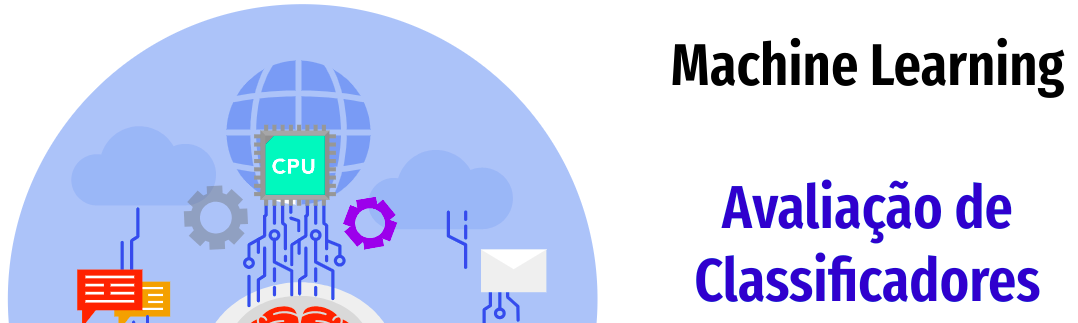


**Pessoa estudante**:  INSIRA SEU NOME AQUI! Maria Júlia Pessoa Cunha (mjpc@cesar.school)

**Objetivo da Prática**

```
O objetivo desta prática é construir um classificador para predizer as pessoas que sobreviveram, ou não, ao desastre do RMS Titanic. Desta forma vocês devem importar o dataset do Titanic da última prática, considerando as colunas que vocês julgam interessante para construir o modelo de classificação da coluna 'Survived'. É de extrema importância levar em consideração os insights e etapa de pré-processamento realizado na Prática 01.
```

**Instruções para a prática.**

1. Importar o dataset do titanic da forma que você julga interessante para classficar se a pessoa sobreviveu ou não.

2. Realizar as etapas nas correspondentes celulas, contendo instruções/dicas e a respectiva pontuação da prática.

3. **Submeter no Classroom até a data limite. Após o prazo limite, punição de 10 pontos por dia de atraso.**

4. Use o chatGPT com moderação. Ele nao acerta sempre nao viu? 😅



In [ ]:
# Celula de definicao das libraries/dataset
import pandas as pd
import matplotlib.pyplot as plt

# Lembre que o dataset da prática 1 é o do link abaixo
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

Dica: tente importar o .csv da sua prática, talvez você já consiga importar aqui!

## Parte 1 - Importação do Dataset

**Pontuação: 5 pontos**


## Importando as bibliotecas necessárias


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

###Limpando e alterando o dataset, com a finalidade de igualar ao dataset final da primeira entrega

Aqui todas as colunas unutilizadas foram removidas e as colunas com dados diferentes de inteiros foram substituidos por dados inteiros para se tornarem dados categóricos

In [ ]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Substituindo os valores ausentes pelo porto mais comum
most_common_port = titanic['Embarked'].mode()[0]
titanic['Embarked'].fillna(most_common_port, inplace=True)

# Remover a coluna Cabin
titanic.drop('Cabin', axis=1, inplace=True)
# Remover a coluna PassengerID
titanic.drop('PassengerId', axis=1, inplace=True)
# Remover a coluna Ticket
titanic.drop('Ticket', axis=1, inplace=True)
# Remover a coluna Name
titanic.drop('Name', axis=1, inplace=True)
# Remover a coluna Fare
titanic.drop('Fare', axis=1, inplace=True)

titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'].replace({'S': 1, 'Q': 2, 'C': 3}, inplace=True)
titanic['Age'] = titanic['Age'].astype(int)

In [ ]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22,1,0,1
1,1,1,1,38,1,0,3
2,1,3,1,26,0,0,1
3,1,1,1,35,1,0,1
4,0,3,0,35,0,0,1


## Parte 2 - Experimento I - Classificação k-NN

**Pontuação: 35 pontos**

Nesta primeira parte nosso objetivo será criar o melhor classificador possível para predizer o status de 'Survived' das instâncias da base do Titanic. Dessa forma, vocês possuem o desafio de criar um classificador com o k-NN. Note que vocês possuem a missão de definir os parâmetros do classificador (valor de k, métrica de distância utilizada e etc).


**DICAS:**

*   Usar GridSearch para definir os melhores parâmetros para classificador. Confira este [artigo](https://www.datasklr.com/select-classification-methods/k-nearest-neighbors)




##Divisão do dataset em conjunto de treinamento e conjunto de teste (70%/30%) utilizando método Holdout


In [ ]:
train_set, test_set = train_test_split(titanic, test_size=0.3, random_state=42)
print("Tamanho do conjunto de treinamento:", len(train_set))
print("Tamanho do conjunto de teste:", len(test_set))

Tamanho do conjunto de treinamento: 623
Tamanho do conjunto de teste: 268


##Criando com classificador K-NN com o conjunto de treinamento

Realizamos uma separação de features e target, divisão de parâmetros para GridSearch, criação do classificador k-NN e a procura dos melhores parâmetros

In [ ]:
# Separar features e target
X_train = train_set.drop('Survived', axis=1)
y_train = train_set['Survived']

# Definir os parâmetros para GridSearch
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # valores de k
    'weights': ['uniform', 'distance'],  # peso das amostras
    'metric': ['euclidean', 'manhattan']  # métricas de distância
}

# Criar o classificador k-NN
knn = KNeighborsClassifier()

# Usar GridSearch para encontrar os melhores parâmetros
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


 Usamos o Grid Search justamente para identificar qual conjunto de ajustes terá o melhor desempenho para o KNN, de modo automatizado, já que não é possível ter essa informação antecipadamente, caracterizando-se rápido e sistemático.

### Usando o classificador criado em 2, avaliamos o resultado na base de teste. Deve-se apresentar o resultado do seu melhor classificador indicando os parâmetros do mesmo (valor de k, métrica de distância), juntamente com a matriz de confusão para a base de teste para seu melhor classificador.

Parâmetros do melhor classificador
Valor de k: 9
Métrica de distância: manhattan


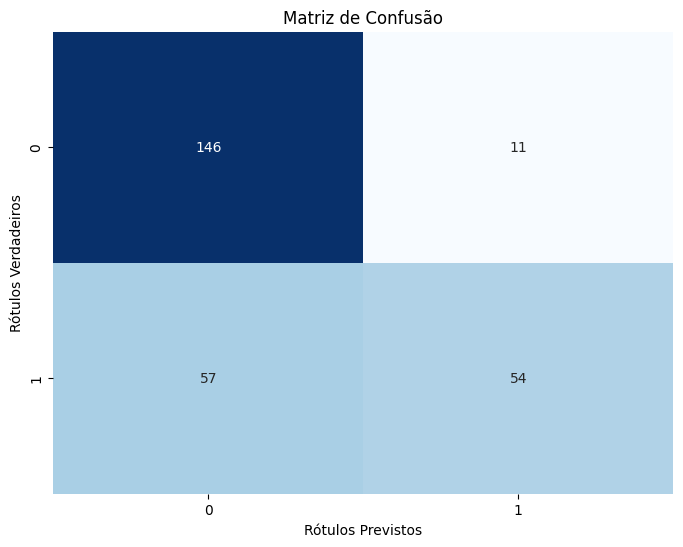

In [ ]:
# Separar features e target da base de teste
X_test = test_set.drop('Survived', axis=1)
y_test = test_set['Survived']

# Usar os melhores parâmetros encontrados pelo GridSearchCV
best_params = grid_search.best_params_
best_k = best_params['n_neighbors']
best_metric = best_params['metric']

# Criar o classificador k-NN com os melhores parâmetros
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)

# Treinar o classificador com os dados de treinamento completos
best_knn.fit(X_train, y_train)

# Prever os rótulos da base de teste
y_pred = best_knn.predict(X_test)

# Apresentar os parâmetros do melhor classificador
print("Parâmetros do melhor classificador")
print(f"Valor de k: {best_k}")
print(f"Métrica de distância: {best_metric}")

# Calcular e apresentar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Verdadeiros")
plt.show()

## Parte 3 - Experimento II - Classificação k-NN com Validação Cruzada

**Pontuação: 35 pontos**

Em nosso segundo experimento, vamos agora aplicar o processo de validação cruzada para poder garantir de fato que temos o melhor modelo possível, utilizando o k-NN!

Volte a prática do Titanic e avalie o seu modelo de acordo com as métricas abordadas na base de testes:

1. Treine novamente um classificador kNN ainda com o melhor valor de k
encontrando anteriormente, porém utilizando validação cruzada com 5 folds. **Exiba os resultados de Matriz Confusão, Precisão, Cobertura, Acurácia e F1-Score.**

3. Descubra o melhor valor de k novamente, agora executando várias vezes a validação cruzada com diferentes valores possíveis (mude o número de folds!).Avalie o seu modelo de acordo com as métricas abordadas na base de testes: Matriz Confusão, Precisão, Cobertura, Acurácia e F1-Score





### Treine novamente um classificador kNN ainda com o melhor valor de k encontrando anteriormente, porém utilizando validação cruzada com 5 folds. Exiba os resultados de Matriz Confusão, Precisão, Cobertura, Acurácia e F1-Score.


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       392
           1       0.72      0.48      0.57       231

    accuracy                           0.74       623
   macro avg       0.73      0.68      0.69       623
weighted avg       0.73      0.74      0.72       623

Métricas de Avaliação:
Precisão: 0.7307537199276875
Cobertura: 0.6832482993197279
F1-Score: 0.6913307231245165
Acurácia: 0.7367576243980738




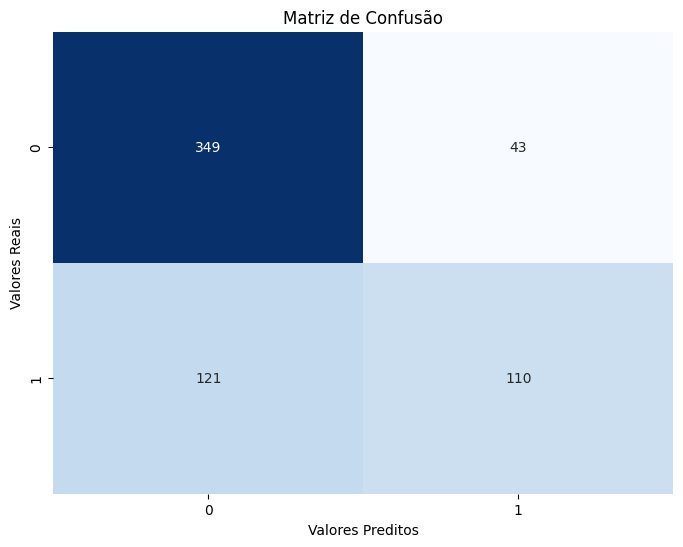

In [ ]:
# Criar o classificador k-NN com o melhor valor de k encontrado anteriormente
best_k = grid_search.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors=best_k)

# Realizar a validação cruzada com 5 folds
y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=5)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_train, y_pred_cv)

# Exibir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_train, y_pred_cv))

# Extrair métricas do relatório de classificação
report = classification_report(y_train, y_pred_cv, output_dict=True)
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']
accuracy = report['accuracy']

# Extrair métricas do relatório de classificação
report = classification_report(y_train, y_pred_cv, output_dict=True)
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']
accuracy = report['accuracy']

# Imprimir as métricas
print("Métricas de Avaliação:")
print(f"Precisão: {precision}")
print(f"Cobertura: {recall}")
print(f"F1-Score: {f1_score}")
print(f"Acurácia: {accuracy}")

print("\n")

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Reais")
plt.show()

 É notável observar que a validação cruzada oferece uma abordagem mais confiável e robusta para avaliar o desempenho do modelo KNN e selecionar os melhores hiperparâmetros, enquanto sem validação cruzada, a avaliação e seleção de hiperparâmetros dependem de uma única divisão dos dados em treinamento e teste.

### Descubra o melhor valor de k novamente, agora executando várias vezes a validação cruzada com diferentes valores possíveis (mude o número de folds!).Avalie o seu modelo de acordo com as métricas abordadas na base de testes: Matriz Confusão, Precisão, Cobertura, Acurácia e F1-Score

Número de Folds: 3
Número de Folds: 4
Número de Folds: 5
Número de Folds: 6
Número de Folds: 7
Número de Folds: 8
Número de Folds: 9
Número de Folds: 10

Melhores resultados
Melhor valor de k: 5

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       392
           1       0.74      0.57      0.64       231

    accuracy                           0.77       623
   macro avg       0.76      0.73      0.74       623
weighted avg       0.76      0.77      0.76       623



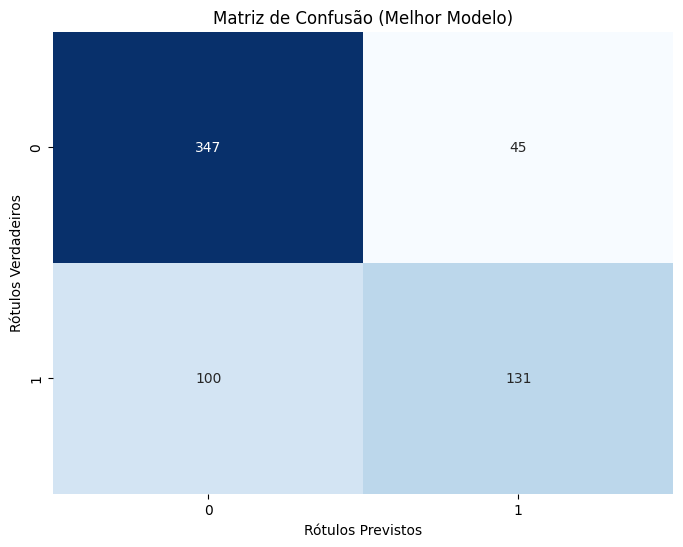

In [ ]:
# Definir os possíveis valores de k
possible_k_values = [3, 5, 7, 9]

# Inicializar variáveis para armazenar as melhores métricas e o melhor valor de k
best_metrics = {'accuracy': 0}
best_k = None

# Iterar sobre diferentes números de folds
for folds in range(3, 11):
    print(f"Número de Folds: {folds}")

    # Inicializar um classificador k-NN
    knn = KNeighborsClassifier()

    # Realizar validação cruzada com o número de folds atual
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)

    for k in possible_k_values:
        # Definir o valor de k
        knn.set_params(n_neighbors=k)

        # Realizar a validação cruzada
        y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=kf)

        # Calcular métricas
        accuracy = np.mean(y_pred_cv == y_train)

        # Se as métricas forem melhores, atualize os melhores valores
        if accuracy > best_metrics['accuracy']:
            best_metrics['accuracy'] = accuracy
            best_k = k
            best_confusion_matrix = confusion_matrix(y_train, y_pred_cv)
            best_classification_report = classification_report(y_train, y_pred_cv)

# Exibir os resultados do melhor modelo
print("\nMelhores resultados")
print(f"Melhor valor de k: {best_k}")
print("\nRelatório de Classificação:")
print(best_classification_report)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(best_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão (Melhor Modelo)")
plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Verdadeiros")
plt.show()

## Parte 4 - Avaliação de Classificadores

Considerando as técnicas k-NN, SVM e Naive Bayes e usando técnicas de Validação Cruzada:

1.   Defina os melhores parâmetros para cade técnica.
2.   Analise as métricas de classificação (Matriz Confusão, Precisão, Cobertura, Acurácia e F1-Score) para um classificador baseado.


**Pontuação: 25 pontos**






Em ambos os casos a matriz de confusão foi feita em conjunto com uma Curva ROC, podendo proporcionar uma avaliação mais completa e detalhada do desempenho dos modelos, ajudando a identificar pontos fortes e áreas de melhoria.

### Naive Bayes

Melhores parâmetros para Naive Bayes: {'var_smoothing': 0.0012328467394420659}

Métricas de classificação para Naive Bayes:

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       157
           1       0.75      0.72      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



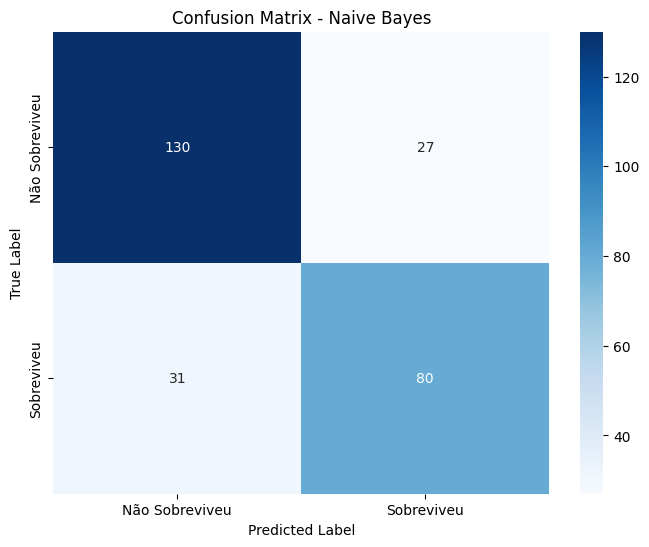

In [ ]:
# Definir os parâmetros para GridSearch
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Inicializar o classificador Naive Bayes
nb = GaussianNB()

# Usar GridSearch para encontrar os melhores parâmetros
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

# Melhores parâmetros encontrados
print("Melhores parâmetros para Naive Bayes:", grid_search_nb.best_params_)

# Avaliar o modelo com os melhores parâmetros
best_nb = grid_search_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test)

# Exibir métricas de classificação
print("\nMétricas de classificação para Naive Bayes:")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_nb))

# Calcular a matriz de confusão
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Sobreviveu', 'Sobreviveu'], yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

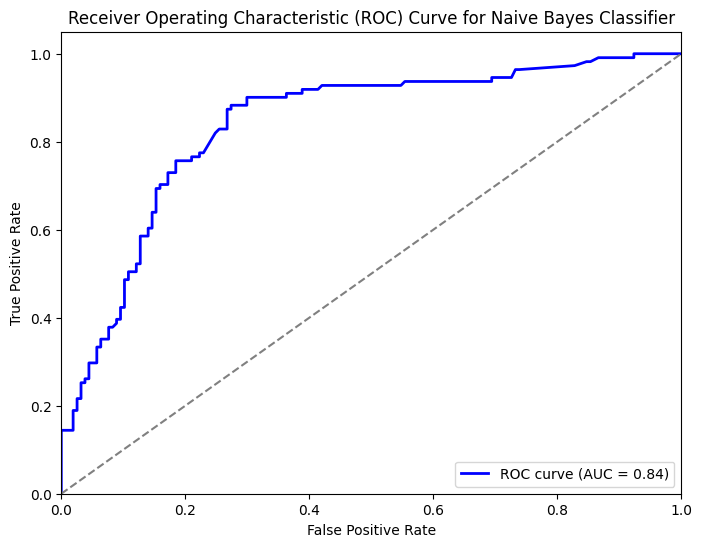

In [ ]:
# Calcular as probabilidades das classes
y_prob_nb = best_nb.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nb)

# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()

### SVM

Melhores parâmetros para SVM: {'C': 100, 'kernel': 'rbf'}

Métricas de classificação para SVM:

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268

Melhores parâmetros para SVM: {'C': 100, 'kernel': 'rbf'}




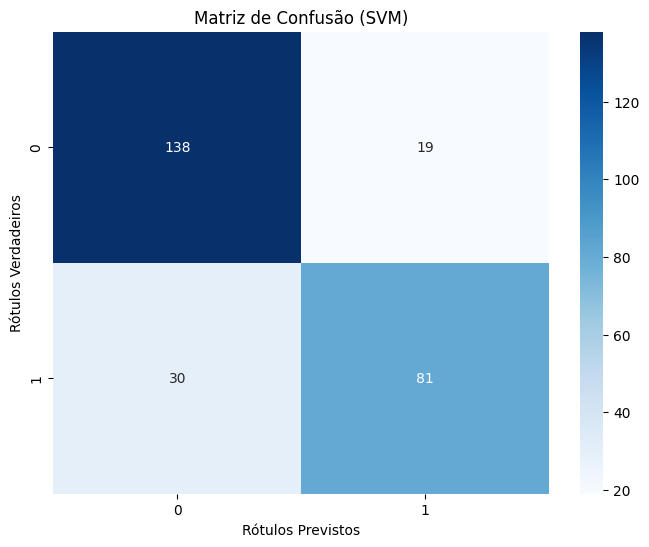

In [ ]:
### Definir os parâmetros para GridSearch
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # parâmetro de regularização
    'kernel': ['linear', 'rbf', 'poly'],  # kernel a ser usado
}

# Criar o classificador SVM
svm = SVC()

# Usar GridSearch para encontrar os melhores parâmetros
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Melhores parâmetros encontrados
print("Melhores parâmetros para SVM:", grid_search_svm.best_params_)

# Avaliar o modelo com os melhores parâmetros
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Exibir métricas de classificação
print("\nMétricas de classificação para SVM:")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_svm))

# Criar o classificador SVM
svm = SVC()

# Usar GridSearch para encontrar os melhores parâmetros
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Melhores parâmetros encontrados
print("Melhores parâmetros para SVM:", grid_search_svm.best_params_)

# Avaliar o modelo com os melhores parâmetros
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_svm)

print("\n")

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Matriz de Confusão (SVM)")
plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Verdadeiros")
plt.show()

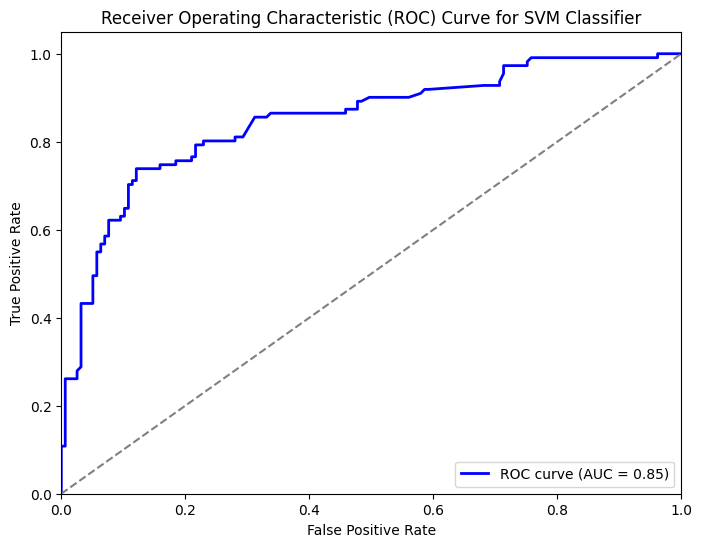

In [ ]:
# Calcular as probabilidades das classes
y_prob_svm = best_svm.decision_function(X_test)

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)

# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM Classifier')
plt.legend(loc='lower right')
plt.show()

### k-NN

Melhores parâmetros para k-NN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

Métricas de classificação para k-NN:

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       157
           1       0.83      0.56      0.67       111

    accuracy                           0.77       268
   macro avg       0.79      0.74      0.74       268
weighted avg       0.78      0.77      0.76       268



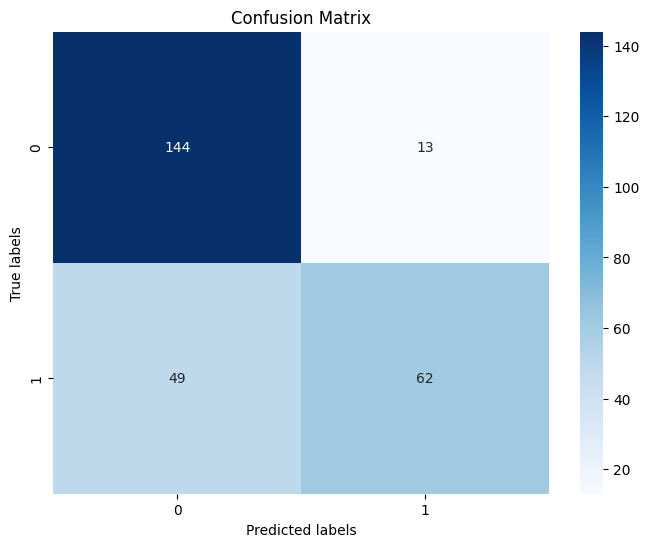

In [ ]:
#### Definir os parâmetros para GridSearch
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # valores de k
    'weights': ['uniform', 'distance'],  # peso das amostras
    'metric': ['euclidean', 'manhattan']  # métricas de distância
}

# Criar o classificador k-NN
knn = KNeighborsClassifier()

# Usar GridSearch para encontrar os melhores parâmetros
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Melhores parâmetros encontrados
print("Melhores parâmetros para k-NN:", grid_search_knn.best_params_)

# Avaliar o modelo com os melhores parâmetros
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Exibir métricas de classificação
print("\nMétricas de classificação para k-NN:")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_knn))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred_knn)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

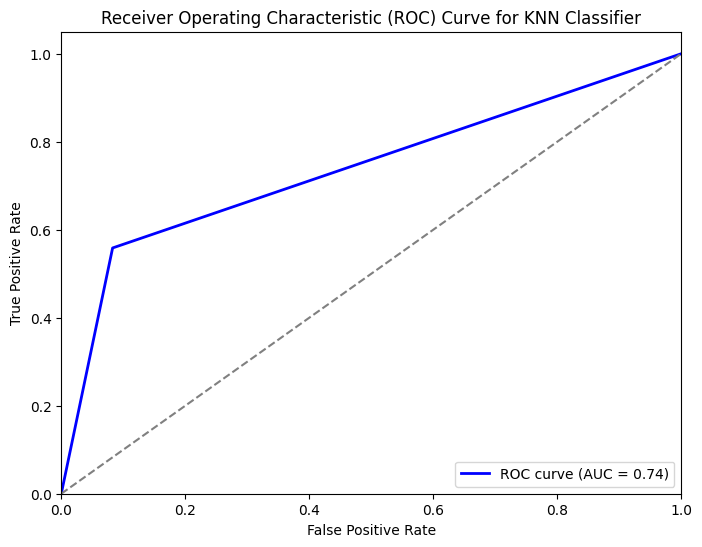

In [ ]:
# Fazer previsões
y_pred_knn = best_knn.predict(X_test)

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN Classifier')
plt.legend(loc='lower right')
plt.show()